The code of this python file is taken from:

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html


In [4]:
# import libraries

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


### Loading CIFAR 10 dataset

The torchvision datasets loads images in PIL imgae objects format. These images in DL models are often represented using pixel values in the range [0,1]. This common range ensures that all the input values are on a common scale.

The transfor.Compose() function uses parameters passed in an array to perform two operations on PIL image objects

* Prepocessing:
1. transforms.ToTensor() converts a PIL image or Numpy array into Pytorch tensor.

2. transforms. Normalize() takes two inputs contatining mean and standard deviation values for each color in the color channel.

* Data Augmentation 
The common practice in ML is to normalize the pixel values from [0,1] to the range [-1,1] which center the data around 0. This ensures uniform Gradient updates, avoiding skewness in Gradient updates, standardized inputs and imporved learning effiency resulting in overall stable and efficient training process.


In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
 transforms.RandomHorizontalFlip(), transforms.RandomRotation(10)])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:02<00:00, 70177157.22it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


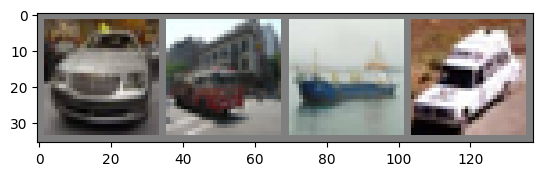

car   truck ship  car  


In [6]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Define a CNN

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # first convolution layer takes first input for three color channels, produces 6 output channels and uses a kernel of size 5*5
        self.pool = nn.MaxPool2d(2, 2) # This step defines a max pooling layer with a window of 2*2 and a stride of 2.
        self.conv2 = nn.Conv2d(6, 16, 5) # Second convolution layer, takes six outputs from conv1 layer and produces 16 output channels with a kernel of size 5*5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # First fully connected (linear) layer; flattens output of last convolutional layer into a vectore and connects it to a 120 output nodes.
        self.fc2 = nn.Linear(120, 84) # Second fully-connected layer; connects 120-dimension output from last fc1 layer to 84 nodes.
        self.fc3 = nn.Linear(84, 10) # Last fully-connected layer which gives output from 10 nodes representing the 10 classes of this classification task.

    # Method to define the forward pass of input in the CNN
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # Apply the conv1 layer to the input followed by a ReLU activation function and then max pooling.
        x = self.pool(F.relu(self.conv2(x))) # Apply conv2 layer same a previous step.
        x = torch.flatten(x, 1) # flatten all dimensions into a 1D vector except batch
        x = F.relu(self.fc1(x)) # Pass flattened vector to the fully connected layer followed by the ReLU function.
        x = F.relu(self.fc2(x)) # Pass the output from last fc1 layer to fc2 layer followed by another ReLU function.
        x = self.fc3(x) #The final layer is lastly another fc3 layer
        return x


net = Net() # Create an instance of Net class.

### Define a Loss function and Optimizer

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # Create instance of CrossEntropyLoss class from pytorch's neural network module

 # Stochastic Gradient Descent. In this step all trainable parameters of the net object will be passed to the optimizer,
 # These parameters like weights and biases will be adjusted by the optimizer to adjust the minimum loss during the training.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the Network

In [12]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.179
[1,  4000] loss: 1.802
[1,  6000] loss: 1.650
[1,  8000] loss: 1.536
[1, 10000] loss: 1.538
[1, 12000] loss: 1.463
[2,  2000] loss: 1.411
[2,  4000] loss: 1.366
[2,  6000] loss: 1.362
[2,  8000] loss: 1.311
[2, 10000] loss: 1.307
[2, 12000] loss: 1.290
Finished Training


### Test model on test data

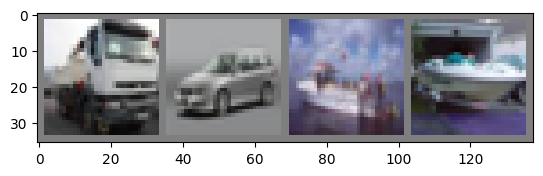

GroundTruth:  truck car   ship  ship 


In [14]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [16]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  truck car   ship  ship 


### Prediction of labels on complete test set

In [18]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 52 %


### Per Class performance

In [19]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.3 %
Accuracy for class: car   is 41.8 %
Accuracy for class: bird  is 52.6 %
Accuracy for class: cat   is 50.2 %
Accuracy for class: deer  is 32.8 %
Accuracy for class: dog   is 35.0 %
Accuracy for class: frog  is 48.4 %
Accuracy for class: horse is 61.7 %
Accuracy for class: ship  is 58.7 %
Accuracy for class: truck is 73.1 %


### Training on GPU

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
net.to(device)